## Задание 1

Импортируйте библиотеки `pandas, numpy` и `matplotlib`.  
Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки `sklearn`.  
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)`
с помощью функции `train_test_split` так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.  
Масштабируйте данные с помощью `StandardScaler`.  
Постройте модель TSNE на тренировочный данных с параметрами:  

`n_components=2, learning_rate=250, random_state=42`.  

Постройте диаграмму рассеяния на этих данных.  


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()

In [3]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = boston.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [17]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

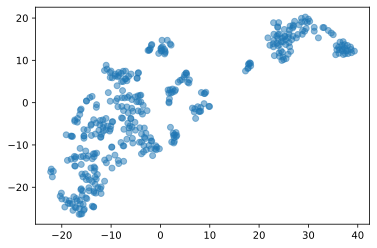

In [28]:
# построим диаграмму рассеяния

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5)

## Задание 2  

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма `X_train`.      
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`,
и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения `price` и `CRIM` в разных кластерах.


In [30]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [34]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [36]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

Text(-5, -20, 'Cluster 2')

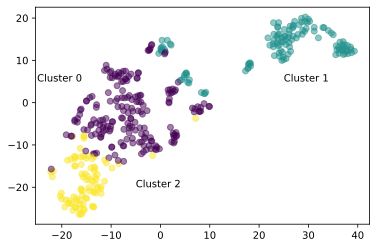

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, alpha=0.5)
plt.text(-25, 5, 'Cluster 0')
plt.text(25, 5, 'Cluster 1')
plt.text(-5, -20, 'Cluster 2')

**Mean price for each cluster (train)**

In [49]:
y_train[labels_train == 0].mean()

24.958115183246072

In [51]:
y_train[labels_train == 1].mean()

16.165354330708663

In [52]:
y_train[labels_train == 2].mean()

27.78837209302326

In [82]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

Text(0.5, 0, 'price')

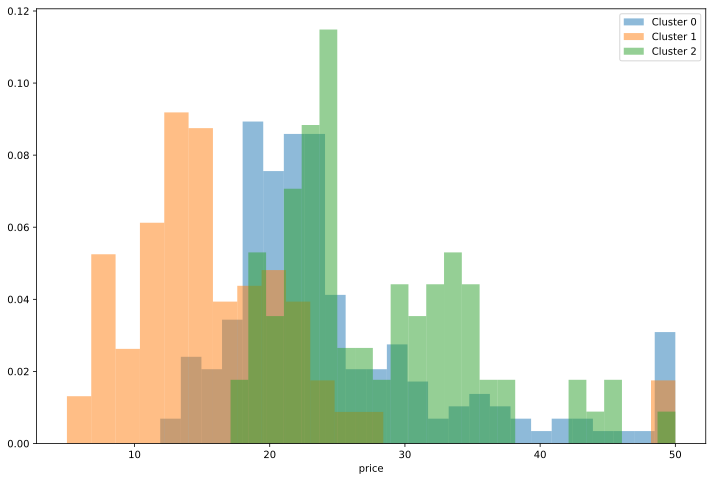

In [83]:
plt.hist(y_train[labels_train == 0], bins=25, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=25, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=25, density=True, alpha=0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('price')

**Mean CRIM for each cluster (train)**

In [56]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.4216602094240837

In [57]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196851

In [58]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.07356558139534884

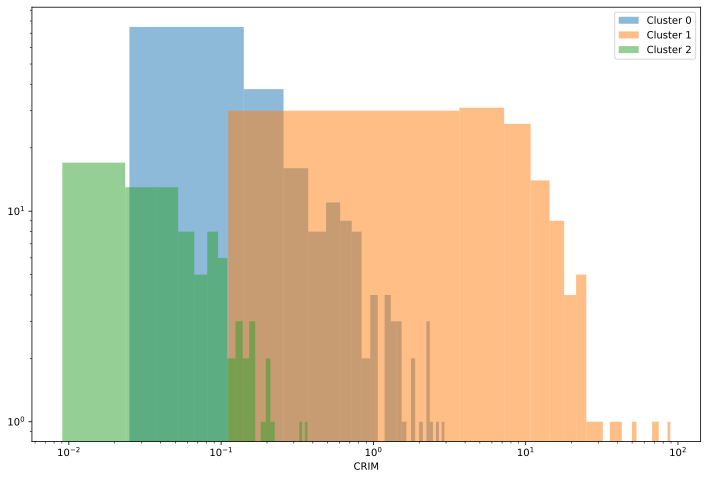

In [86]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=25, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=25, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=25, alpha=0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('CRIM')
plt.xscale(value='log')
plt.yscale(value='log')

## *Задание 3

Примените модель `KMeans`, построенную в предыдущем задании,
к данным из тестового набора.  
Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.


In [87]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

**Mean price for each cluster (test)**

In [94]:
y_test[labels_test == 0].mean(), y_test[labels_test == 1].mean(), y_test[labels_test == 2].mean()

(21.860784313725492, 16.43714285714286, 31.35)

In [102]:
X_test.loc[labels_test == 0, 'CRIM'].mean(), X_test.loc[labels_test == 1, 'CRIM'].mean(), X_test.loc[labels_test == 2, 'CRIM'].mean()

(0.2660788235294118, 10.165531142857143, 0.06206)